In [10]:
import pandas as pd

df = pd.read_csv(r"C:\db\Clean_Dataset.csv")

In [12]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [16]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [18]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [22]:
df["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [26]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [28]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [30]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [32]:
df["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [36]:
df["duration"]

0          2.17
1          2.33
2          2.17
3          2.25
4          2.33
          ...  
300148    10.08
300149    10.42
300150    13.83
300151    10.00
300152    10.08
Name: duration, Length: 300153, dtype: float64

In [38]:
df["duration"].min()

0.83

In [40]:
df["duration"].max()

49.83

In [42]:
df["duration"].median()

11.25

Preprocessing


In [47]:
df = df.drop("Unnamed: 0",axis =1)
df = df.drop("flight", axis =1)

df["class"] = df["class"].apply(lambda x: 1 if x == "Business" else 0)

In [59]:
pd.factorize(df.stops)

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64), Index([0, 1, 2], dtype='int64'))

In [61]:
df.stops = pd.factorize(df.stops)[0]

In [63]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [75]:
pd.get_dummies(df.airline)

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
300148,False,False,False,False,False,True
300149,False,False,False,False,False,True
300150,False,False,False,False,False,True
300151,False,False,False,False,False,True


In [77]:
pd.get_dummies(df.airline,prefix="airline")

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
300148,False,False,False,False,False,True
300149,False,False,False,False,False,True
300150,False,False,False,False,False,True
300151,False,False,False,False,False,True


In [79]:
df.join(pd.get_dummies(df.airline,prefix="airline"))

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,False,False,False,False,True,False
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,False,False,False,False,True,False
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,True,False,False,False,False,False
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,False,False,False,False,False,True
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,False,False,False,False,False,True
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,False,False,False,False,False,True
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,False,False,False,False,False,True
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,False,False,False,False,False,True


In [82]:
df = df.join(pd.get_dummies(df.airline,prefix="airline")).drop("airline",axis=1)

In [84]:
df

,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,False,False,False,False,True,False
1,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,False,False,False,False,True,False
2,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,True,False,False,False,False,False
3,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,False,False,False,False,False,True
4,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265,False,False,False,False,False,True
300149,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105,False,False,False,False,False,True
300150,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099,False,False,False,False,False,True
300151,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585,False,False,False,False,False,True


In [86]:

df = df.join(pd.get_dummies(df.source_city,prefix="source")).drop("source_city",axis=1)
df = df.join(pd.get_dummies(df.destination_city,prefix="dest")).drop("destination_city",axis=1)
df = df.join(pd.get_dummies(df.arrival_time,prefix="arrival")).drop("arrival_time",axis=1)
df = df.join(pd.get_dummies(df.departure_time,prefix="departure")).drop("departure_time",axis=1)

In [88]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


Training Regression Model

In [93]:
from sklearn.model_selection import train_test_split


In [97]:
from sklearn.ensemble import RandomForestRegressor

X,y = df.drop("price",axis = 1), df.price

In [99]:
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,False,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [101]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) #test_size=0.2 ifadesi, verinin %20'sinin test seti olarak ayrılacağını belirtir. Geri kalan %80 ise eğitim seti olarak kullanılır

In [105]:
reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
reg.score(X_test,y_test)

0.9851731610575621

In [109]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [113]:
y_pred = reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test,y_pred)))


R2:  0.9851731610575621
MAE:  1073.3583837927847
MSE:  7656630.626922553
RMSE:  2767.0617316790303


Text(0.5, 1.0, 'Prediction VS Actual Price')

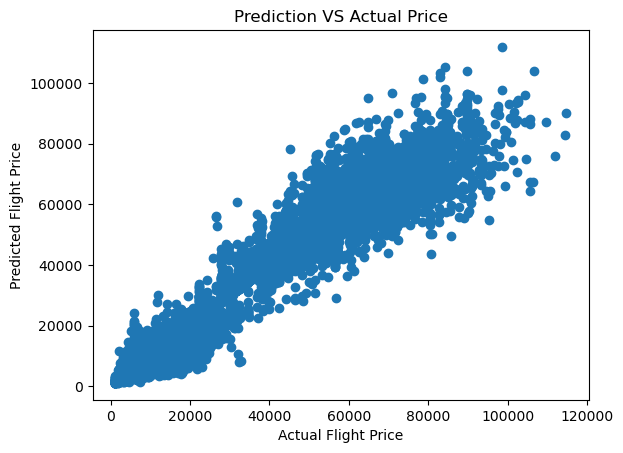

In [115]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")

In [117]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [121]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key = lambda x: x[1], reverse = True) #sıralamanın büyükten küçüğe doğru (azalan sıra) yapılmasını sağlar

sorted_importances

[('class', 0.8802167543329691),
 ('duration', 0.05720987842749961),
 ('days_left', 0.0186308161278156),
 ('airline_Air_India', 0.005178594927023608),
 ('airline_Vistara', 0.0047936003991833846),
 ('source_Delhi', 0.003499275257276927),
 ('dest_Delhi', 0.003233707628014119),
 ('source_Mumbai', 0.002213124751153326),
 ('dest_Mumbai', 0.001893739407853458),
 ('stops', 0.0018603063438307425),
 ('source_Kolkata', 0.001841761595392673),
 ('dest_Kolkata', 0.0018192823217507608),
 ('arrival_Evening', 0.0017495341096360666),
 ('dest_Hyderabad', 0.0015224788699434951),
 ('dest_Bangalore', 0.0013988816641646758),
 ('source_Hyderabad', 0.001279662987695307),
 ('arrival_Night', 0.0011387412052352426),
 ('source_Bangalore', 0.00108060597734468),
 ('departure_Evening', 0.0010417056665560636),
 ('arrival_Afternoon', 0.0010412821279773186),
 ('source_Chennai', 0.0009773575524836798),
 ('dest_Chennai', 0.0009040637620293781),
 ('departure_Morning', 0.0008839091097988321),
 ('departure_Early_Morning', 0.

<BarContainer object of 5 artists>

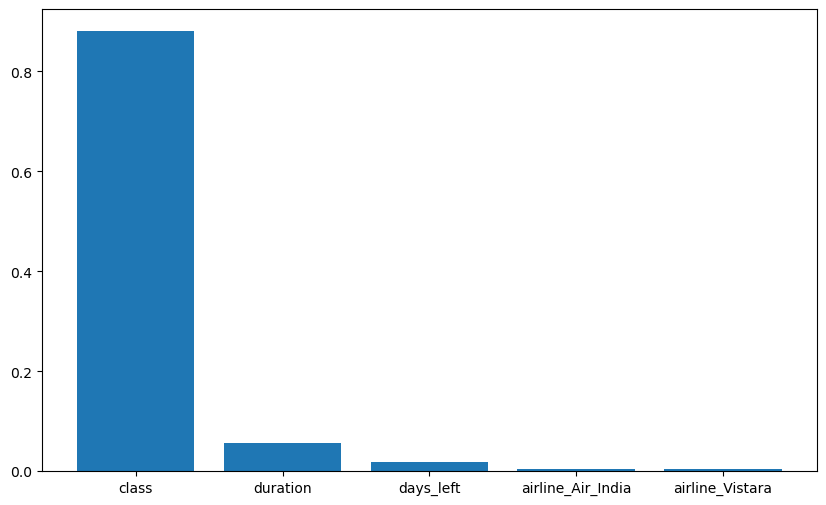

In [125]:
plt.figure(figsize = (10,6)) #figürün genişliğini 10 inç ve yüksekliğini 6 inç olarak belirler.
plt.bar([x[0] for x in sorted_importances [:5]], [x[1] for x in sorted_importances [:5]])
#en önemli 5 özelliğin önem derecelerini çubuk grafikte gösterir. Grafik, en önemli özelliklerin adlarını x ekseninde ve bu özelliklerin önem derecelerini y ekseninde gösterir.

In [127]:
from sklearn.model_selection import GridSearchCV

In [145]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    "n_estimators": randint(100, 300),  # Ağaç sayısı, 100 ile 300 arasında rastgele bir tam sayı.
    "max_depth": [None, 10, 20, 30, 40, 50],  # Ağaçların maksimum derinliği, None (sınırsız), 10, 20, 30, 40 veya 50 olabilir.
    "min_samples_split": randint(2, 11),  # Bir iç düğümü bölmek için gereken minimum örnek sayısı, 2 ile 11 arasında rastgele bir tam sayı.
    "min_samples_leaf": randint(1, 5),  # Bir yaprak düğümünde bulunması gereken minimum örnek sayısı, 1 ile 5 arasında rastgele bir tam sayı.
    "max_features": [1.0, "sqrt", "log2", None]  # Her ağacı ayırmak için kullanılan maksimum özellik sayısı, 1.0 (tüm özellikler), "sqrt", "log2" veya None.
}

reg = RandomForestRegressor(n_jobs=-1)  # Tüm kullanılabilir işlemcileri kullanarak modelin çalışmasını sağlar.
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring="neg_mean_squared_error", verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [147]:
best_regressor.score(X_test,y_test)

0.9861700846648425

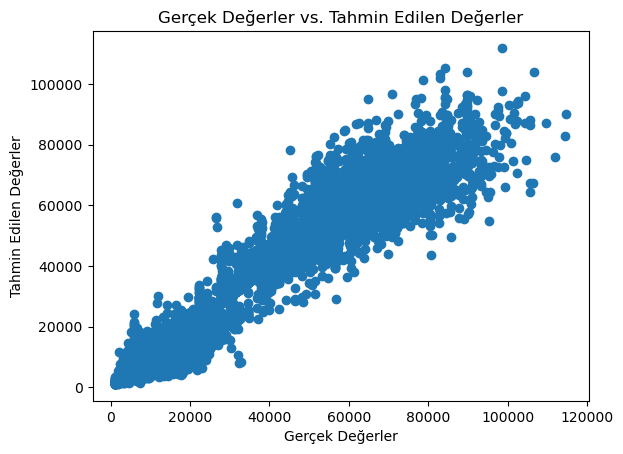

In [157]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()
